In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy.stats import chi2_contingency

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: d:\java\anaconda\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


# DATA UNDERSTANDING

In [4]:
df = pd.read_csv('D:/COAPPS INTERN/health_care.csv')

In [5]:
df.head()

,Name,Age,Blood Type,Gender,Test Result,Disease,Medication
0,Amber Nguyen,43,AB+,Male,Normal,Malaria,"['Antimalarial drugs', 'Antipyretics']"
1,Anthony Werner,76,B+,Male,Normal,Cervical spondylosis,"['Pain relievers', 'Muscle relaxants']"
2,Fred Clark,43,O-,Male,Normal,Hyperthyroidism,"['Antithyroid medications', 'Beta-blockers']"
3,Cody Taylor,61,O-,Male,Abnormal,Jaundice,['Liver transplant']
4,Derek Thompson,69,AB-,Female,Normal,Dimorphic hemorrhoids (piles),"['Pain relievers', 'Warm baths']"


In [6]:
 df.shape

(5000, 7)

In [7]:
 df.info

<bound method DataFrame.info of                     Name  Age Blood Type  Gender   Test Result  \
0           Amber Nguyen   43        AB+    Male        Normal   
1         Anthony Werner   76         B+    Male        Normal   
2             Fred Clark   43         O-    Male        Normal   
3            Cody Taylor   61         O-    Male      Abnormal   
4         Derek Thompson   69        AB-  Female        Normal   
...                  ...  ...        ...     ...           ...   
4995  Melissa Valenzuela   63         O+    Male  Inconclusive   
4996     Daniel Gonzalez   21         B+    Male  Inconclusive   
4997         Susan Glass   46         O+    Male        Normal   
4998      Rebecca Wagner   56        AB+  Female  Inconclusive   
4999      Joshua Cochran   39         A-    Male  Inconclusive   

                                     Disease  \
0                                    Malaria   
1                       Cervical spondylosis   
2                            Hy

In [8]:
print("Columns in the dataset:")
for column in df.columns:
    print(column)

Columns in the dataset:
Name
Age
Blood Type
Gender
Test Result
Disease
Medication


In [9]:
 df.describe()

,Age
count,5000.000000
mean,47.076200
std,21.552153
min,10.000000
25%,28.000000
50%,47.000000
75%,66.000000
max,84.000000


In [10]:
df.describe(include='O')

,Name,Blood Type,Gender,Test Result,Disease,Medication
count,5000,5000,5000,5000,5000,5000
unique,4825,8,2,3,43,250
top,Jessica Smith,AB+,Male,Normal,Impetigo,"['Antibiotics', 'Antipyretics']"
freq,6,1176,2711,2476,228,148


In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Name: ['Amber Nguyen' 'Anthony Werner' 'Fred Clark' ... 'Susan Glass'
 'Rebecca Wagner' 'Joshua Cochran']
Unique values in Age: [43 76 61 69 73 56 22 29 39 70 58 79 74 68 42 18 54 11 26 36 27 38 40 67
 63 62 47 84 78 35 55 31 34 71 21 10 16 66 64 37 13 75 57 17 23 50 82 15
 24 30 51 46 32 41 25 19 81 59 80 48 77 53 45 72 65 60 12 83 28 33 49 44
 52 20 14]
Unique values in Blood Type: ['AB+' 'B+' 'O-' 'AB-' 'B-' 'O+' 'A-' 'A+']
Unique values in Gender: ['Male' 'Female']
Unique values in Test Result: ['Normal' 'Abnormal' 'Inconclusive']
Unique values in Disease: ['Malaria' 'Cervical spondylosis' 'Hyperthyroidism' 'Jaundice'
 'Dimorphic hemorrhoids (piles)' 'Hypothyroidism'
 'GERD (Gastroesophageal Reflux Disease)' 'Impetigo' 'Alcoholic hepatitis'
 'Urinary tract infection' 'Acne' 'Chronic cholestasis' 'Hypoglycemia'
 'Heart attack' 'Common Cold' 'Tuberculosis' 'Fungal infection'
 'Hepatitis B' 'Psoriasis' 'Peptic ulcer disease' 'Varicose veins'
 'Chickenpox' 'Vertigo (Pa

## DATA CLEANING

In [12]:
df.drop(['Name'],axis=1,inplace = True)

In [13]:
df.head()

,Age,Blood Type,Gender,Test Result,Disease,Medication
0,43,AB+,Male,Normal,Malaria,"['Antimalarial drugs', 'Antipyretics']"
1,76,B+,Male,Normal,Cervical spondylosis,"['Pain relievers', 'Muscle relaxants']"
2,43,O-,Male,Normal,Hyperthyroidism,"['Antithyroid medications', 'Beta-blockers']"
3,61,O-,Male,Abnormal,Jaundice,['Liver transplant']
4,69,AB-,Female,Normal,Dimorphic hemorrhoids (piles),"['Pain relievers', 'Warm baths']"


In [14]:
df.isnull().sum()

Age            0
Blood Type     0
Gender         0
Test Result    0
Disease        0
Medication     0
dtype: int64

In [15]:
df.duplicated().sum()

178

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(4822, 6)

In [18]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers_age = detect_outliers_iqr(df['Age'])

if not outliers_age.empty:
    print("Outliers in the 'Age' column:")
    print(outliers_age)
else:
    print("No outliers found in the 'Age' column.")


No outliers found in the 'Age' column.


## EXPLORATORY DATA ANALYSIS

In [19]:
for col in df.columns:
    most_frequent_values = df[col].value_counts().head(5)
    print(f"Most frequent values in {col}:")
    print(most_frequent_values)
    print()

Most frequent values in Age:
68    83
46    78
56    77
79    77
37    76
Name: Age, dtype: int64

Most frequent values in Blood Type:
AB+    1109
O+      827
B+      794
O-      439
A+      419
Name: Blood Type, dtype: int64

Most frequent values in Gender:
Male      2603
Female    2219
Name: Gender, dtype: int64

Most frequent values in Test Result:
Normal          2357
Inconclusive    1456
Abnormal        1009
Name: Test Result, dtype: int64

Most frequent values in Disease:
Impetigo                   216
Acne                       214
Tuberculosis               210
Urinary tract infection    192
Hypertension               184
Name: Disease, dtype: int64

Most frequent values in Medication:
['Antibiotics', 'Antipyretics']             144
['Insulin', 'Metformin']                     98
['Antibiotics', 'Analgesics']                88
['Antibiotics', 'Urinary analgesics']        86
['IV fluids', 'Medications for itching']     81
Name: Medication, dtype: int64



In [20]:
from scipy.stats import chi2_contingency
import random

p_values = []

for column in df.columns:
    if column != 'Medication':
        contingency_table = pd.crosstab(df[column], df['Medication'])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
        p_values.append((column, p_val))


P-value for Age: 0.03
P-value for Blood Type: 0.97
P-value for Gender: 0.29
P-value for Test Result: 0.03
P-value for Disease: 0.01


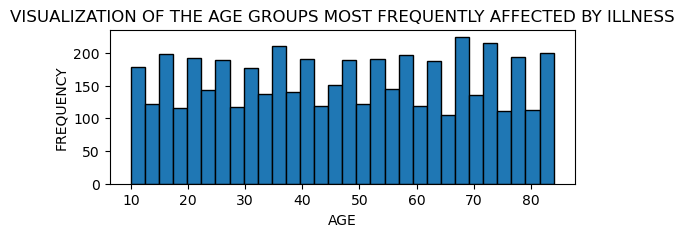

In [21]:
plt.figure(figsize=(6, 2)) 
plt.hist(df['Age'],bins=30,edgecolor="black")
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')
plt.title('VISUALIZATION OF THE AGE GROUPS MOST FREQUENTLY AFFECTED BY ILLNESS')
plt.show()

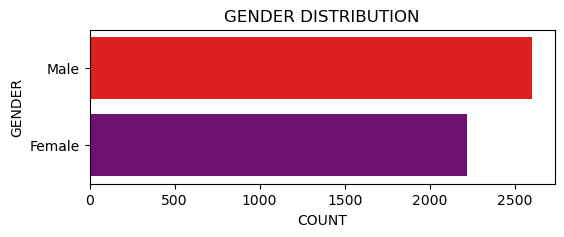

In [22]:
custom_palette = {'Male': 'red', 'Female': 'purple'}
plt.figure(figsize=(6, 2))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index, palette=custom_palette)
plt.title('GENDER DISTRIBUTION')
plt.xlabel('COUNT')
plt.ylabel('GENDER')
plt.show()

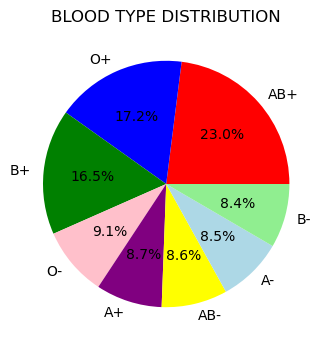

In [23]:
plt.figure(figsize=(6, 4))
df['Blood Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green', 'pink','purple','yellow','lightblue','lightgreen'])
plt.title('BLOOD TYPE DISTRIBUTION')
plt.ylabel('')
plt.show()


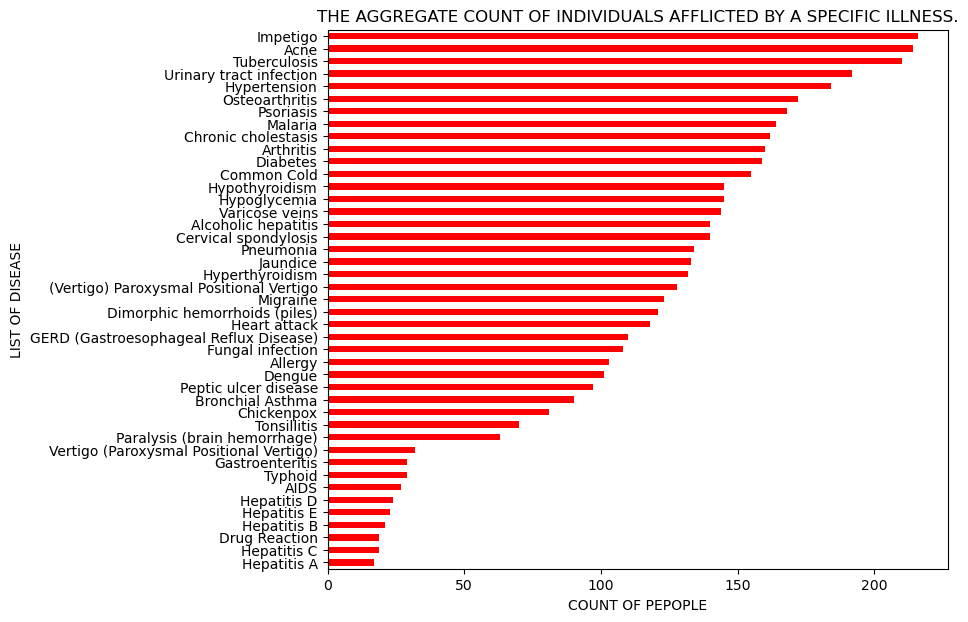

In [24]:
plt.figure(figsize=(8, 7))
df['Disease'].value_counts().sort_values().plot(kind='barh', color='red')
plt.title('THE AGGREGATE COUNT OF INDIVIDUALS AFFLICTED BY A SPECIFIC ILLNESS.')
plt.xlabel('COUNT OF PEPOPLE')
plt.ylabel('LIST OF DISEASE')
plt.show()

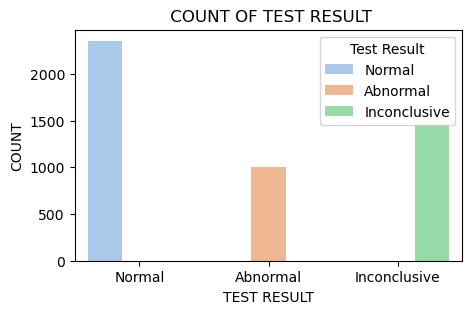

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Test Result', hue='Test Result', data=df, palette='pastel')
plt.title(' COUNT OF TEST RESULT')
plt.xlabel('TEST RESULT')
plt.ylabel('COUNT')
plt.show()

## DATA PREPROCESSING

In [26]:
categorical_columns = ['Disease','Test Result']
numerical_columns = ['Age']

X = df[categorical_columns + numerical_columns]
y = df['Medication']

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns,)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

## DATA MODELLING

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [30]:
y_pred = classifier.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Decision Tree Classifier")
print("Accuracy: {:.2f}".format(accuracy))

Decision Tree Classifier
Accuracy: 97.86


In [31]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("CROSS VALIDATION FOR DECISION TREE CLASSIFIER")
print("CROSS VALIDATION SCORES:", cv_scores)

CROSS VALIDATION FOR DECISION TREE CLASSIFIER
CROSS VALIDATION SCORES: [0.97185185 0.9762963  0.98518519 0.98814815 0.97333333]


In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state=22)
classifier2.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [33]:
y_pred_train = classifier2.predict(X_train)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Random Forest Classifier")
print("Accuracy: {:.2f}".format(accuracy))

Random Forest Classifier
Accuracy: 97.86


In [34]:
cv_scores = cross_val_score(classifier2, X_train, y_train, cv=5)
print("CROSS VALIDATION FOR RANDOM FOREST CLASSIFIER")
print("CROSS VALIDATION SCORES:", cv_scores)

CROSS VALIDATION FOR RANDOM FOREST CLASSIFIER
CROSS VALIDATION SCORES: [0.97333333 0.97481481 0.98814815 0.98814815 0.96888889]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier4 = KNeighborsClassifier() 
classifier4.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [36]:
y_pred = classifier4.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("KNN")
print("TAccuracy: {:.2f}".format(accuracy))

KNN
TAccuracy: 0.48


In [37]:
cv_scores = cross_val_score(classifier4, X_train_scaled, y_train, cv=5)
print("CROSS VALIDATION FOR KNN")
print("CROSS VALIDATION SCORES:", cv_scores)

CROSS VALIDATION FOR KNN
CROSS VALIDATION SCORES: [0.93185185 0.93037037 0.9362963  0.93185185 0.91407407]


In [38]:
from sklearn.svm import SVC

classifier6 = SVC(random_state=29)
classifier6.fit(X_train_scaled, y_train)


SVC(random_state=29)

In [39]:
y_pred = classifier6.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Support Vector Machines")
print("Accuracy: {:.2f}".format(accuracy))

Support Vector Machines
Accuracy: 55.22


In [40]:
cv_scores = cross_val_score(classifier6, X_train_scaled, y_train, cv=5)
print("CROSS VALIDATION FOR SUPPORT VECTOR MACHINES")
print("CROSS VALIDATION SCORES:", cv_scores)

CROSS VALIDATION FOR SUPPORT VECTOR MACHINES
CROSS VALIDATION SCORES: [0.57481481 0.57777778 0.58518519 0.58222222 0.56148148]


In [41]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=9)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=9)

In [42]:
y_pred = logreg.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Support Vector Machines")
print("Accuracy: {:.2f}".format(accuracy))

Support Vector Machines
Accuracy: 80.86


In [43]:
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
print("CROSS VALIDATION FOR LOGISTIC REGRESSION")
print("CROSS VALIDATION SCORES:", cv_scores)

CROSS VALIDATION FOR LOGISTIC REGRESSION
CROSS VALIDATION SCORES: [0.81777778 0.80444444 0.8237037  0.8237037  0.78518519]


In [44]:
def prediction(age, disease, test_result):

    features = pd.DataFrame([[age, disease, test_result]],
                            columns=['Age', 'Disease','Test Result'])

    transformed_features = preprocessor.transform(features)

    predicted_medication = classifier.predict(transformed_features).reshape(1, -1)

    return predicted_medication[0]

age = 35
disease = 'Tuberculosis'
test_results = 'Inconclusive'
result = prediction(age,disease,test_results)
print(result)

["['Isoniazid', 'Rifampin']"]


In [45]:
import joblib
joblib.dump(classifier, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [46]:
joblib.dump(preprocessor, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']